## This module builds Machine Learning models on the data & visualize their accuracies with & without Cross validation

In [1]:
# Filter & ignore warnings for clear output visualization

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import all necessary packages

import os
import pandas as pd
from decimal import Decimal
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
# Import packages associated with the ML models considered

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
# Define global variables we use throughout
current_directory = os.getcwd()
current_directory = current_directory.replace("/Single-Use-Code", "")
data_path = current_directory + "/Datasets-CSV"

data = pd.read_csv(data_path + "/Disease_Symptom_Dataset_For_All_Symptom_Subsets.csv")
X = data.iloc[:, 1:]
Y = data.iloc[:, 0:1]

# Split with 85%-15% ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

# Variables to store the accuracies with & without cross validation
model_list = []
model_accuracy_with_cross_validation = []
model_accuracy_without_cross_validation = []

### Functions to use Machine Learning Models

In [5]:
# Defines a function to use Logistic Regression 

def LogisticRegressionModel():
    
    global x_train, x_test, y_train, y_test
    
    # Create Logistic Regression Classifier & fit the data to it
    lr_classifier = LogisticRegression()
    lr_classifier = lr_classifier.fit(x_train, y_train)
    
    # Make predictions based using Logistic Regression
    lr_prediction = lr_classifier.predict(x_test)
    
    # Find the accuracy obtained
    lr_accuracy = round(Decimal(accuracy_score(y_test, lr_prediction) * 100), 2)
    
    # Append accuracy to the global list
    model_list.append("LR")
    model_accuracy_without_cross_validation.append(lr_accuracy)
    
    # Using cross validation with 5 splits 
    lr_accuracies = cross_val_score(lr_classifier, X, Y, cv=10)
    
    # Find the cross validation accuracy by taking mean over obtained accuracies
    lr_mean_accuracy = round(Decimal(lr_accuracies.mean() * 100), 2)
    model_accuracy_with_cross_validation.append(lr_mean_accuracy)
    
    # Track the results
    print("\n----- LOGISTIC REGRESSION -----")
    print(f"Accuracy without cross validation: {lr_accuracy}%")
    print(f"Accuracy with cross validation: {lr_mean_accuracy}%")
    

In [6]:
# Defines a function to use Random Forest Classifier

def RandomForestModel():
    
    global x_train, x_test, y_train, y_test
    
    # Create Random Forest Classifier & fit the data to it
    rf_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy')
    rf_classifier = rf_classifier.fit(x_train, y_train)
    
    # Make predictions based using Logistic Regression
    rf_prediction = rf_classifier.predict(x_test)
    
    # Find the accuracy obtained
    rf_accuracy = round(Decimal(accuracy_score(y_test, rf_prediction) * 100), 2)
    
    # Append accuracy to the global list
    model_list.append("RF")
    model_accuracy_without_cross_validation.append(rf_accuracy)
    
    # Using cross validation with 5 splits 
    rf_accuracies = cross_val_score(rf_classifier, X, Y, cv=10)
    
    # Find the cross validation accuracy by taking mean over obtained accuracies
    rf_mean_accuracy = round(Decimal(rf_accuracies.mean() * 100), 2)
    model_accuracy_with_cross_validation.append(rf_mean_accuracy)
    
    # Track the results
    print("\n----- RANDOM FOREST -----")
    print(f"Accuracy without cross validation: {rf_accuracy}%")
    print(f"Accuracy with cross validation: {rf_mean_accuracy}%")
    

In [7]:
# Defines a function to use KNN Classifier

def KnnModel():
    
    global x_train, x_test, y_train, y_test
    
    # Create KNN Classifier & fit the data to it
    knn_classifier = KNeighborsClassifier(n_neighbors=10, weights='distance', n_jobs=4)
    knn_classifier = knn_classifier.fit(x_train, y_train)
    
    # Make predictions based using Logistic Regression
    knn_prediction = knn_classifier.predict(x_test)
    
    # Find the accuracy obtained
    knn_accuracy = round(Decimal(accuracy_score(y_test, knn_prediction) * 100), 2)
    
    # Append accuracy to the global list
    model_list.append("KNN")
    model_accuracy_without_cross_validation.append(knn_accuracy)
    
    # Using cross validation with 5 splits 
    knn_accuracies = cross_val_score(knn_classifier, X, Y, cv=10)
    
    # Find the cross validation accuracy by taking mean over obtained accuracies
    knn_mean_accuracy = round(Decimal(knn_accuracies.mean() * 100), 2)
    model_accuracy_with_cross_validation.append(knn_mean_accuracy)
    
    # Track the results
    print("\n----- KNN CLASSIFIER -----")
    print(f"Accuracy without cross validation: {knn_accuracy}%")
    print(f"Accuracy with cross validation: {knn_mean_accuracy}%")
    

In [8]:
# Defines a function to use Multinomial Naive Bayes Classifier

def MultinomialNBModel():
    
    global x_train, x_test, y_train, y_test
    
    # Create KNN Classifier & fit the data to it
    mnb_classifier = MultinomialNB()
    mnb_classifier = mnb_classifier.fit(x_train, y_train)
    
    # Make predictions based using Logistic Regression
    mnb_prediction = mnb_classifier.predict(x_test)
    
    # Find the accuracy obtained
    mnb_accuracy = round(Decimal(accuracy_score(y_test, mnb_prediction) * 100), 2)
    
    # Append accuracy to the global list
    model_list.append("MNB")
    model_accuracy_without_cross_validation.append(mnb_accuracy)
    
    # Using cross validation with 5 splits 
    mnb_accuracies = cross_val_score(mnb_classifier, X, Y, cv=10)
    
    # Find the cross validation accuracy by taking mean over obtained accuracies
    mnb_mean_accuracy = round(Decimal(mnb_accuracies.mean() * 100), 2)
    model_accuracy_with_cross_validation.append(mnb_mean_accuracy)
    
    # Track the results
    print("\n----- MULTINOMIAL NAIVE BAYES -----")
    print(f"Accuracy without cross validation: {mnb_accuracy}%")
    print(f"Accuracy with cross validation: {mnb_mean_accuracy}%")
    

### Functions to visualize the results

In [9]:
# Function to plot accuracies

def VisualizeResults(title_str, accuracy_list, plt):
    
    # Set plot style & dimensions
    plt.style.use("seaborn-poster")
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot()
    
    # Set title & labels
    plt.title(title_str)
    plt.xlabel("Classifier")
    plt.ylabel("% Accuracy")
    
    # Plot the results
    plt.bar(model_list, accuracy_list, color='green')
    for i, j in enumerate(accuracy_list):
        ax.text(float(i)-0.15, float(j)+0.7, str(j), color='blue')
        
    # Display the results
    plt.show()
    

### Execution steps to build ML models & Visualize the results

Running Logistic Regression...

----- LOGISTIC REGRESSION -----
Accuracy without cross validation: 92.85%
Accuracy with cross validation: 93.56%

Running Random Forest...

----- RANDOM FOREST -----
Accuracy without cross validation: 91.87%
Accuracy with cross validation: 92.04%

Running KNN model...

----- KNN CLASSIFIER -----
Accuracy without cross validation: 92.20%
Accuracy with cross validation: 92.09%

Running Multinomial Naive Bayes...

----- MULTINOMIAL NAIVE BAYES -----
Accuracy without cross validation: 89.72%
Accuracy with cross validation: 90.33%


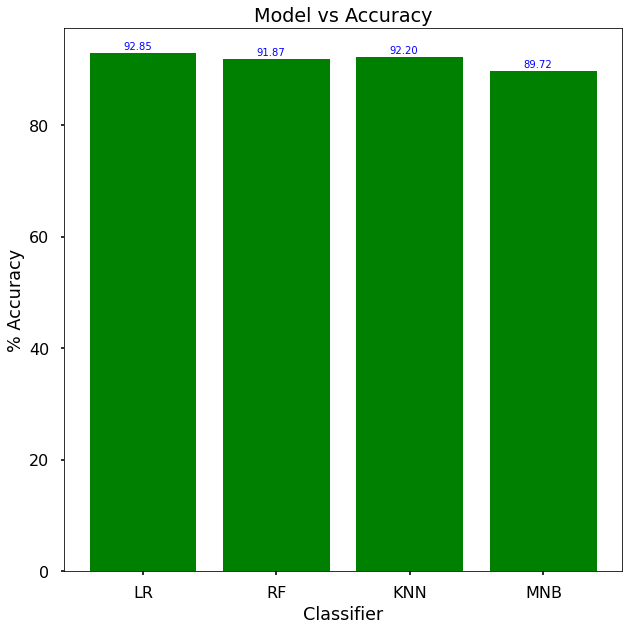

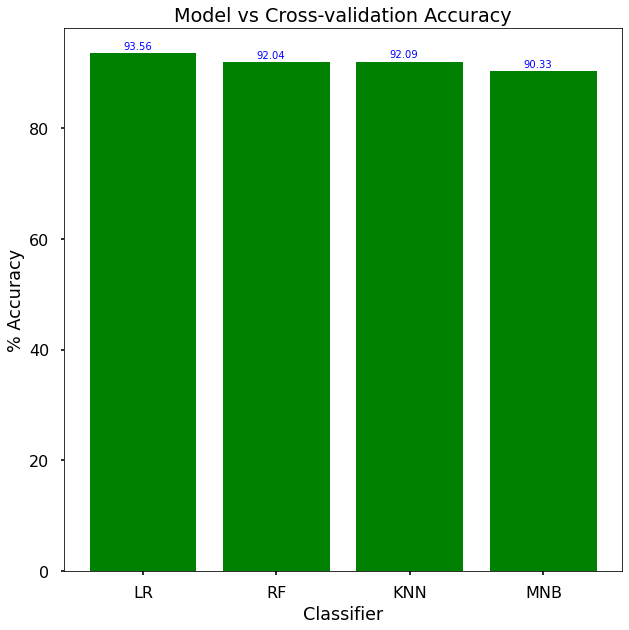

In [10]:
# Invoke functions associated with the ML models we considered
# This step takes around 5 mins
print("Running Logistic Regression...")
LogisticRegressionModel()

print("\nRunning Random Forest...")
RandomForestModel()

print("\nRunning KNN model...")
KnnModel()

print("\nRunning Multinomial Naive Bayes...")
MultinomialNBModel()

# Obtain plots
VisualizeResults("Model vs Accuracy", model_accuracy_without_cross_validation, plt1)
VisualizeResults("Model vs Cross-validation Accuracy", model_accuracy_with_cross_validation, plt2)
